In [1]:
# First we'll create a new folder to put kaggle.json into
!mkdir /root/.kaggle

# Let's confirm that the directory is created
!cd /root/ && ls -la

total 64
drwx------ 1 root root 4096 Apr  8 11:55 .
drwxr-xr-x 1 root root 4096 Apr  8 11:55 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Apr  6 13:56 .cache
drwx------ 4 root root 4096 Apr  6 13:55 .config
drwxr-xr-x 5 root root 4096 Apr  6 13:55 .ipython
drwx------ 2 root root 4096 Apr  6 13:55 .jupyter
drwxr-xr-x 2 root root 4096 Apr  8 11:55 .kaggle
drwxr-xr-x 2 root root 4096 Apr  6 13:52 .keras
drwxr-xr-x 1 root root 4096 Apr  6 13:55 .local
drwxr-xr-x 4 root root 4096 Apr  6 13:55 .npm
-rw-r--r-- 1 root root  161 Dec  5  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  165 Apr  6 13:55 .wget-hsts


In [2]:
# Move kaggle.json to .kaggle directory
!mv kaggle.json /root/.kaggle/kaggle.json

# Change file permission to allow python to access it
!chmod 600 /root/.kaggle/kaggle.json

# List files inside .kaggle to confirm that the file is moved
!cd /root/.kaggle && ls -la

total 16
drwxr-xr-x 2 root root 4096 Apr  8 11:55 .
drwx------ 1 root root 4096 Apr  8 11:55 ..
-rw------- 1 root root   69 Apr  8 11:55 kaggle.json


In [3]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 95% 39.0M/41.0M [00:00<00:00, 101MB/s] 
100% 41.0M/41.0M [00:00<00:00, 83.2MB/s]


In [4]:
!unzip /content/fake-and-real-news-dataset.zip

Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
Fake_data = pd.read_csv('/content/Fake.csv')

In [7]:
Fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
True_data = pd.read_csv('/content/True.csv')

In [9]:
True_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
Fake_data['isFake']=0
True_data['isFake']=1

In [11]:
Fake_data.head()

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
True_data.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
Fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   isFake   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [14]:
True_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   isFake   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [15]:
df=pd.concat([Fake_data,True_data]).reset_index(drop=True)
df

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [16]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
isFake     0
dtype: int64

In [17]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,date,isFake,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


In [18]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = set(STOP_WORDS)

In [19]:
df['original'] = df['original'].apply(lambda x: " ".join([w for w in str(x).split() if not w in stop_words]))
df.head()

,title,text,subject,date,isFake,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’s...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Duri...


In [20]:
df['original'] = df['original'].str.replace('[^\w\s]','')

<ipython-input-20-88553fd940f9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['original'] = df['original'].str.replace('[^\w\s]','')


In [21]:
df.head()

,title,text,subject,date,isFake,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Years ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obamas Name C...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Duri...


In [22]:
df['isFake'].value_counts()

0    23481
1    21417
Name: isFake, dtype: int64

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(44689, 6)

In [24]:
df['isFake'].value_counts()

0    23478
1    21211
Name: isFake, dtype: int64

In [25]:
nlp = spacy.load('en_core_web_sm')

In [26]:
tokens = []
lemma = []
for tweet in nlp.pipe(df['original'], batch_size=100, n_process=3):
  if tweet.is_parsed:
    tokens.append([e.text for e in tweet])
    lemma.append([n.lemma_ for n in tweet])
  else:
    tokens.append(None)
    lemma.append(None)
df['tokens'] = tokens
df['lemma'] = lemma

<ipython-input-26-05fcd1345900>:4: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if tweet.is_parsed:


In [27]:
df

,title,text,subject,date,isFake,original,tokens,lemma
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Years ...,"[Donald, Trump, Sends, Out, Embarrassing, New,...","[Donald, Trump, Sends, out, Embarrassing, New,..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian C...,"[Drunk, Bragging, Trump, Staffer, Started, Rus...","[drunk, bragging, Trump, Staffer, start, Russi..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke ...,"[Sheriff, David, Clarke, Becomes, An, Internet...","[Sheriff, David, Clarke, become, an, internet,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obamas Name C...,"[Trump, Is, So, Obsessed, He, Even, Has, Obama...","[trump, be, so, obsess, he, even, have, Obamas..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Duri...,"[Pope, Francis, Just, Called, Out, Donald, Tru...","[Pope, Francis, just, call, out, Donald, Trump..."
...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,Fully committed NATO backs new US approach Afg...,"[Fully, committed, NATO, backs, new, US, appro...","[fully, committed, NATO, back, new, US, approa..."
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,LexisNexis withdrew products Chinese market LO...,"[LexisNexis, withdrew, products, Chinese, mark...","[LexisNexis, withdraw, product, chinese, marke..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,Minsk cultural hub haven authorities MINSK Reu...,"[Minsk, cultural, hub, haven, authorities, MIN...","[minsk, cultural, hub, haven, authority, MINSK..."
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,Vatican upbeat possibility Pope Francis visiti...,"[Vatican, upbeat, possibility, Pope, Francis, ...","[vatican, upbeat, possibility, Pope, Francis, ..."


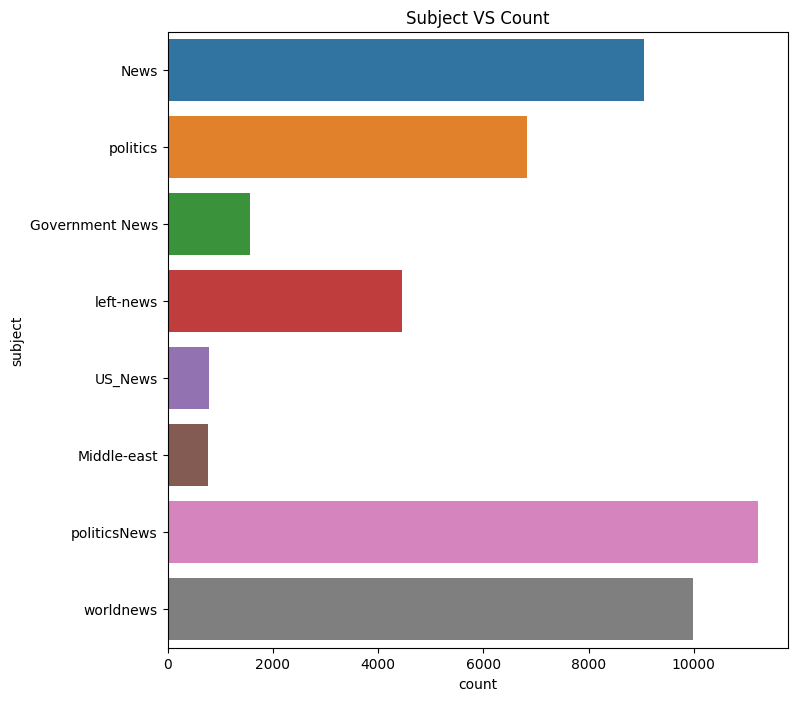

In [26]:
plt.figure(figsize = (8, 8))
plt.title("Subject VS Count")
sns.countplot(y = "subject", data = df)
plt.show()

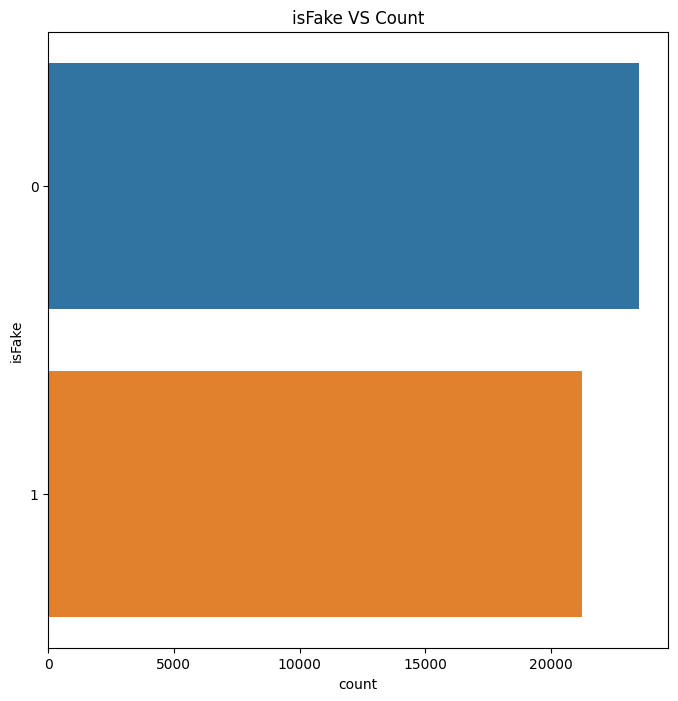

In [27]:
plt.figure(figsize = (8, 8))
plt.title("isFake VS Count")
sns.countplot(y = "isFake", data = df)
plt.show()

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isFake == 1].original))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isFake == 0].original))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [30]:
import gensim
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [31]:
df['cleaned'] = df['original'].apply(preprocess)

In [32]:
df['cleaned'][0]

['donald',
 'trump',
 'sends',
 'embarrassing',
 'years',
 'message',
 'disturbing',
 'donald',
 'trump',
 'couldn',
 'wish',
 'americans',
 'happy',
 'year',
 'leave',
 'instead',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'reality',
 'star',
 'couldn',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',
 'president',
 'sends',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infan

In [33]:
list_of_words = []
for i in df.cleaned:
    for j in i:
        list_of_words.append(j)

In [ ]:
list_of_words

In [35]:
# Obtaining The Total Number Of Unique Words
total_words = len(list(set(list_of_words)))
total_words

193978

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df['original'],df['isFake'],test_size=0.2)

In [39]:
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)

In [40]:
# tokenize the text into vectors 
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [41]:
print("The encoding for document\n",df.cleaned[0],"\n is : \n\n",train_sequences[0])

The encoding for document
 ['donald', 'trump', 'sends', 'embarrassing', 'years', 'message', 'disturbing', 'donald', 'trump', 'couldn', 'wish', 'americans', 'happy', 'year', 'leave', 'instead', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'reality', 'star', 'couldn', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'year', 'president', 'angry', 'pants', 'tweeted', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'year', 'great', 'year', 'america', 'donald', 'trump', 'realdonaldtrump', 'december', 'trump', 'tweet', 'went', 'welll', 'expectwhat', 'kind', 'president', 'sends', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'allow', 'rise

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=total_words,
        output_dim=32,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 10)

Epoch 1/10
503/503 [==============================] - 156s 300ms/step - loss: 0.2240 - accuracy: 0.8732 - val_loss: 0.0118 - val_accuracy: 0.9980
Epoch 2/10
503/503 [==============================] - 151s 299ms/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.0100 - val_accuracy: 0.9983
Epoch 3/10
503/503 [==============================] - 151s 300ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0083 - val_accuracy: 0.9986
Epoch 4/10
503/503 [==============================] - 156s 311ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 5/10
503/503 [==============================] - 188s 374ms/step - loss: 5.6536e-04 - accuracy: 0.9999 - val_loss: 0.0078 - val_accuracy: 0.9983
Epoch 6/10
503/503 [==============================] - 151s 300ms/step - loss: 2.8317e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9986
Epoch 7/10
503/503 [==============================] - 155s 307ms/step - loss: 2.2442e-04 - accuracy: 1.0000 - val_lo

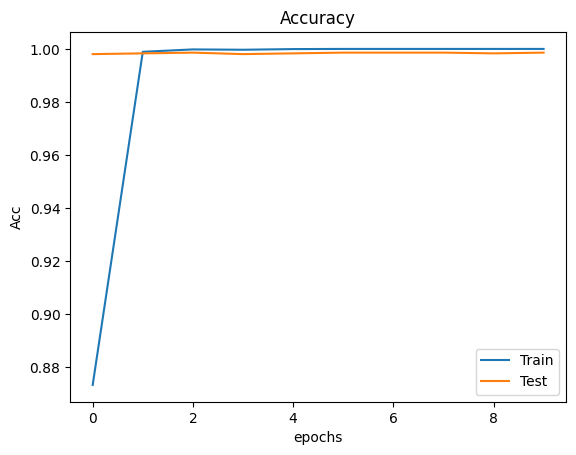

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

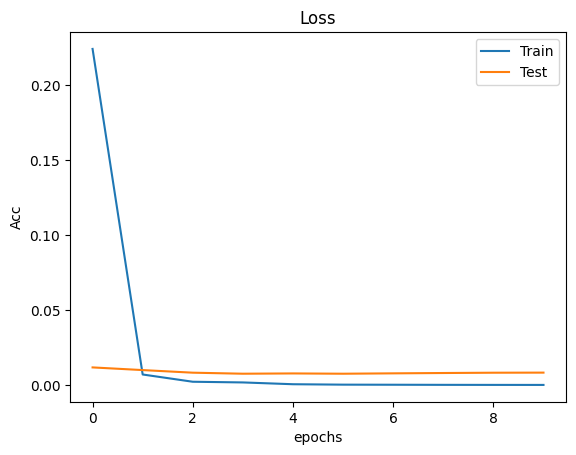

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(padded_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(padded_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9999
Testing Accuracy:  0.9983


In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=total_words,
        output_dim=32,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model1.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 10)

Epoch 1/10
503/503 [==============================] - 140s 236ms/step - loss: 0.2643 - accuracy: 0.8392 - val_loss: 0.0151 - val_accuracy: 0.9972
Epoch 2/10
503/503 [==============================] - 113s 224ms/step - loss: 0.0217 - accuracy: 0.9957 - val_loss: 0.0074 - val_accuracy: 0.9989
Epoch 3/10
503/503 [==============================] - 111s 221ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0048 - val_accuracy: 0.9994
Epoch 4/10
503/503 [==============================] - 112s 222ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0060 - val_accuracy: 0.9986
Epoch 5/10
503/503 [==============================] - 112s 223ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0055 - val_accuracy: 0.9989
Epoch 6/10
503/503 [==============================] - 112s 222ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 7/10
503/503 [==============================] - 112s 223ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.0066 -

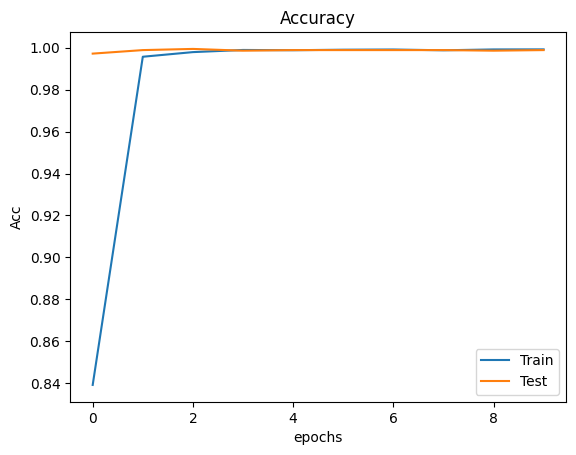

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

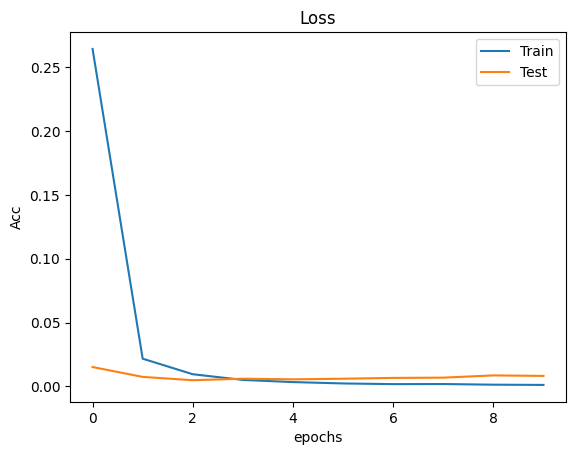

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model1.evaluate(padded_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(padded_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9999
Testing Accuracy:  0.9990


In [43]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=total_words,
        output_dim=32,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
   tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [44]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [45]:
history=model1.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 10)

Epoch 1/10
503/503 [==============================] - 137s 229ms/step - loss: 0.2990 - accuracy: 0.8014 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 2/10
503/503 [==============================] - 109s 216ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0020 - val_accuracy: 0.9989
Epoch 3/10
503/503 [==============================] - 108s 214ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9989
Epoch 4/10
503/503 [==============================] - 108s 214ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 0.9989
Epoch 5/10
503/503 [==============================] - 110s 219ms/step - loss: 7.0667e-04 - accuracy: 0.9999 - val_loss: 0.0046 - val_accuracy: 0.9986
Epoch 6/10
503/503 [==============================] - 112s 222ms/step - loss: 5.3949e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 7/10
503/503 [==============================] - 107s 213ms/step - loss: 3.9527e-04 - accuracy: 1.0000 - val_lo

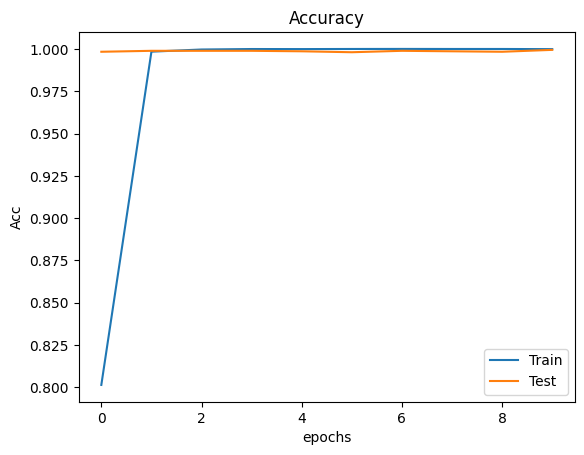

In [46]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

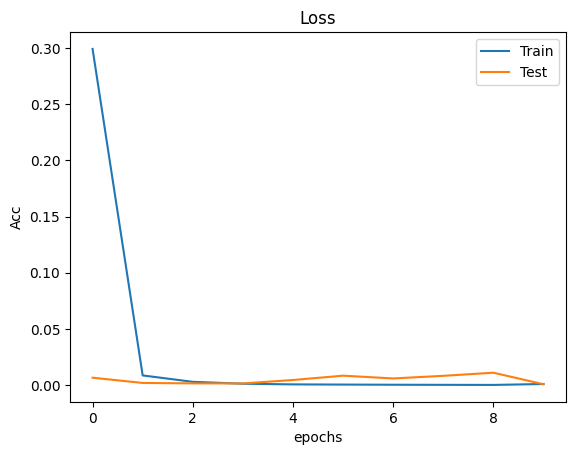

In [47]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [48]:
loss, accuracy = model1.evaluate(padded_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(padded_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9999
Testing Accuracy:  0.9985
